# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Abenojar, Joshua\
_Student No._: 2019-08669\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Joshua M. Abenojar

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

In [25]:
import numpy as np
import pandas as pd
data = np.load('galaxy_catalogue.npy') #read file  

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [26]:
print(data[:2]) # print first two rows

[(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger')
 (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')]


#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [64]:
def get_features_targets(data):
    #create arrays for features and targets
    features=np.zeros([780,13]) #Generate an array to put the features to
    targets=np.array([]) #generate an empty array to append the targets to
    for i in range(780):
        targets=np.append(targets,data[i][16]) #extract "class" from data
        for ii in range(13):
            if ii in [10,11,12]: # for R_50/R_90 columns
                features[i,ii]=data[i][ii]/data[i][ii+3] #R_50/R_90
            elif ii<10:
                features[i,ii]=data[i][ii] # Copy data
    feature_cols=['u-g','g-r','r-i','i-z','eccentricity','m_u','m_g','m_r','m_i','m_z','Ru','Rr','Rz']
    df=pd.DataFrame(Features, columns=feature_cols)
    df.insert(13, "Class", Targets, True)
    #print(df.head(5))
    X=df[feature_cols]
    Y=df.Class

    return X, Y
Features, Targets = get_features_targets(data)

#print("Features Array: ",Features)
print("Features Shape: ",Features.shape)
#print("Target Array: ",Targets)
print("Targets Shape: ",Targets.shape)

Features Shape:  (780, 13)
Targets Shape:  (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [83]:
"""# https://www.datacamp.com/tutorial/decision-tree-classification-python
seedsplit=122333
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Split the data into training data and testing data
Features_train,Features_test,Targets_train,Targets_test=train_test_split(Features,Targets,random_state=seedsplit,train_size=0.8,test_size=0.2)
## Print the size of training and testing data to show that it works
print(f"Features train:{Features_train.shape}; Features test:{Features_test.shape}; Targets train:{Targets_train.shape}; Targets test:{Targets_test.shape}")
## Training
"""
def predict_class(X,Y):
    ## Splitting
    seedsplit=122333
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test=train_test_split(Features,Targets,random_state=seedsplit,train_size=0.8,test_size=0.2)

    # Training
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,Y_train)

    # Testing
    Y_pred=clf.predict(X_test)

    return Y_test.to_numpy(), Y_pred
Actual, Predicted = predict_class(Features, Targets)
for i in np.arange(len(Y_test)):
    print(f"{i} Actual: {Actual[i]}; Predicted: {Predicted[i]}")

0 Actual: merger; Predicted: merger
1 Actual: merger; Predicted: merger
2 Actual: elliptical; Predicted: elliptical
3 Actual: merger; Predicted: merger
4 Actual: elliptical; Predicted: elliptical
5 Actual: spiral; Predicted: merger
6 Actual: spiral; Predicted: spiral
7 Actual: spiral; Predicted: spiral
8 Actual: elliptical; Predicted: elliptical
9 Actual: merger; Predicted: merger
10 Actual: merger; Predicted: merger
11 Actual: spiral; Predicted: spiral
12 Actual: elliptical; Predicted: elliptical
13 Actual: merger; Predicted: merger
14 Actual: merger; Predicted: merger
15 Actual: spiral; Predicted: spiral
16 Actual: elliptical; Predicted: merger
17 Actual: merger; Predicted: merger
18 Actual: elliptical; Predicted: elliptical
19 Actual: merger; Predicted: elliptical
20 Actual: elliptical; Predicted: elliptical
21 Actual: merger; Predicted: merger
22 Actual: spiral; Predicted: spiral
23 Actual: spiral; Predicted: spiral
24 Actual: spiral; Predicted: spiral
25 Actual: elliptical; Predic

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[40.  9.  6.]
 [ 4. 47.  0.]
 [ 3.  3. 44.]]
Test Accuracy = 83.97435897435898%


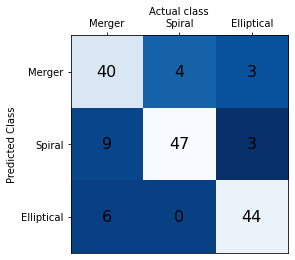

In [150]:
""""        Actual
            0 1 2
Predicted 0
          1
          2
0=merger
1=spiral
2=elliptical
"""
Confusion=np.zeros([3,3])
print(Confusion)
for i in np.arange(len(Y_test)):
    if Actual[i]=="merger":
        if Predicted[i]=="merger":
            Confusion[0][0]+=1
        elif Predicted[i]=="spiral":
            Confusion[1][0]+=1
        else:
            Confusion[2][0]+=1
    if Actual[i]=="spiral":
        if Predicted[i]=="merger":
            Confusion[0][1]+=1
        elif Predicted[i]=="spiral":
            Confusion[1][1]+=1
        else:
            Confusion[2][1]+=1
    if Actual[i]=="elliptical":
        if Predicted[i]=="merger":
            Confusion[0][2]+=1
        elif Predicted[i]=="spiral":
            Confusion[1][2]+=1
        else:
            Confusion[2][2]+=1
print(Confusion)

import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.imshow(Confusion,cmap=plt.cm.Blues_r)
ax.set_xlabel('Actual class')
ax.set_ylabel('Predicted Class')
wiw=['Merger','Spiral','Elliptical']
ax.set_xticks([0,1,2])
ax.set_yticks([0,1,2])
ax.set_xticklabels(wiw)
ax.set_yticklabels(wiw)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
for i in [0,1,2]:
    for ii in [0,1,2]:
        ax.text(i,ii,int(Confusion[i][ii]),fontsize=16,horizontalalignment='center',verticalalignment='center')
print(f"Test Accuracy = {(Confusion[0][0]+Confusion[1][1]+Confusion[2][2])/np.sum(Confusion)*100}%")